In [1]:
#UPDATE this cell with your data source + Dictionary/Codebook
#data source: https://nces.ed.gov/OnlineCodebook/Session/Codebook/dc24b4b9-5ead-4f67-aac9-f5c18767d547#
#data dictionary: https://nces.ed.gov/OnlineCodebook/Session/Codebook/dc24b4b9-5ead-4f67-aac9-f5c18767d547#

In [2]:
#import necessary libaries
import pandas as pd
import matplotlib

In [3]:
#name file path (you will have download your own dataset and populate the path and choose the appropriate cell to execute)
file = 'studentsdata/nhes_19_ecpp_v1_0.csv' # <-- edit this value! 

In [ ]:
#you will run just ONE of the next four code blocks, depending on the file type of your dataset

In [5]:
#read data from CSV (.csv) & print head
df = pd.read_csv(file, low_memory=False)
print(df.head())

        BASMID  RCNOW  RCWEEK  RCTYPE  RCAGE  RCPLACE  RCTIME  RCDAYS  RCHRS  \
0  20191000097      2      -1      -1     -1       -1      -1      -1     -1   
1  20191000098      2      -1      -1     -1       -1      -1      -1     -1   
2  20191000116      2      -1      -1     -1       -1      -1      -1     -1   
3  20191000180      1       1       1     73        2       2       1      3   
4  20191000254      2      -1      -1     -1       -1      -1      -1     -1   

   RCCVRWK  ...  F_TTLHHINC  F_OWNRNTHB  F_HVINTSPHO  F_HVINTCOM  F_CHLDNT  \
0       -1  ...           0           0            0           0         0   
1       -1  ...           0           0            0           0         0   
2       -1  ...           0           0            0           0         0   
3        1  ...           0           0            0           0         0   
4       -1  ...           0           0            0           0         0   

   F_LRNCOMP  F_LRNTAB  F_LRNCELL  F_HHUNID  F_ZIP

In [ ]:
#read data from SAS (.sas7bdat or .sas) & print head
df = pd.read_sas(file)
print(df.head())

In [ ]:
#read data from excel (.xls or .xlsx) & print head
df = pd.read_excel(file)
print(df.head())

In [ ]:
#read data from Stata (.dta) & print head
df = pd.read_excel(file)
print(df.head())

In [6]:
#list columns in data frame
print(list(df))
print(len(df))

['BASMID', 'RCNOW', 'RCWEEK', 'RCTYPE', 'RCAGE', 'RCPLACE', 'RCTIME', 'RCDAYS', 'RCHRS', 'RCCVRWK', 'RCSTRTY', 'RCSTRTM', 'RCSPEAK', 'RCSKNFV', 'RCSKFV', 'RCOTCH', 'RCFEE', 'RCREL', 'RCTANF', 'RCSSAC', 'RCEMPL', 'RCOTHER', 'RCCOST', 'RCUNIT', 'RCCSTHNX', 'RCOTHC', 'RCTLHR', 'NCNOW', 'NCWEEK', 'NCINHH', 'NCPLACE', 'NCTIME', 'NCDAYS', 'NCHRS', 'NCCVRWK', 'NCSTRTY', 'NCSTRTM', 'NCALKNE', 'NCAGE', 'NCSPEAK', 'NCSKNFV', 'NCSKFV', 'NCOTCH', 'NCRCMDPT', 'NCFEE', 'NCREL', 'NCTANF', 'NCSSAC', 'NCEMPL', 'NCOTHER', 'NCCOST', 'NCUNIT', 'NCCSTHNX', 'NCOTHC', 'NCTLHR', 'CPNNOWX', 'CPWEEKX', 'CPPLACEX', 'CPSPRLG', 'CPWORK', 'CPHEADST', 'CPDAYS', 'CPHRS', 'CPCVRWK', 'CPSTRTY', 'CPSTRTM', 'CPSPEAK', 'CPTIME', 'CPRCMDPT', 'CPTEST', 'CPPHYSE', 'CPDENTA', 'CPDISAB', 'CPMEDAM', 'CPSKNFV', 'CPSKFV', 'CPFEE', 'CPREL', 'CPTANF', 'CPSSAC', 'CPEMPL', 'CPOTHER', 'CPCOST', 'CPUNIT', 'CPCSTHNX', 'CPOTHC', 'CPTLHR', 'PCEVRHDX', 'MAINRESN', 'PPCHOIC', 'CRSRCH', 'PPDIFCLT', 'WHYDIFCLT', 'CCPY', 'CCREASN1', 'CCREASN2'

In [7]:
#output frequency table of chosen column in dataset
col = 'TTLHHINC' #<-edit this value! column name as it appears in dataframe
col_name = 'Total income' #<-edit this value! descriptive name for column
freq = df[col].value_counts().rename_axis(col_name).reset_index(name='freq')
freq = freq.sort_values(by = col_name)
print(freq)

    Total income  freq
10             1   329
9              2   359
5              3   505
4              4   506
7              5   487
6              6   490
2              7   657
1              8  1084
0              9  1292
3             10   636
11            11   296
8             12   451


In [17]:
#replace codes with descriptive labels
#if your dataframe already has descriptive labels, you don't need to run this cell
codebook = [['1', '$0 to $10,000'], #<- if appropriate, replace these values based on codebook or data dictionary for your dataset
            ['2', '$10,001 to $20,000'], 
            ['3', '$20,001 to $30,000'], 
            ['4', '$30,001 to $40,000'], 
            ['5', '$40,001 to $50,000'], 
            ['6', '$50,001 to $60,000'], 
            ['7', '$60,001 to $75,000'], 
            ['8', '$75,001 to $100,000'], 
            ['9', '$100,001 to $150,000'], 
            ['10', '$150,001 to $200,000'], 
            ['11', '$200,001 to $250,000'], 
            ['12', '$250,001 or more']]
#loops through label codes and replaces them in frequency table
for lbl in codebook:
    #use line below if codes are stored as integers
    freq[col_name] = freq[col_name].replace(int(lbl[0]), lbl[1])
    #use line below if codes are stored as strings
    #freq[col_name] = freq[col_name].replace(lbl[0], lbl[1])
#prints updated frequency table
print(freq)

            Total income  freq
10         $0 to $10,000   329
9     $10,001 to $20,000   359
5     $20,001 to $30,000   505
4     $30,001 to $40,000   506
7     $40,001 to $50,000   487
6     $50,001 to $60,000   490
2     $60,001 to $75,000   657
1    $75,001 to $100,000  1084
0   $100,001 to $150,000  1292
3   $150,001 to $200,000   636
11  $200,001 to $250,000   296
8       $250,001 or more   451


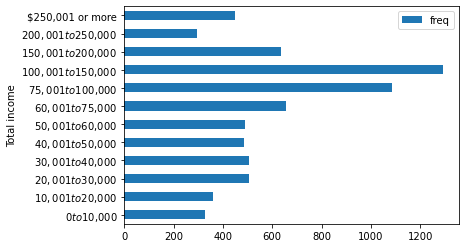

In [18]:
#create frequency chart
ax = freq.plot.barh(x=col_name, y='freq', rot=0)